# Capstone Project - The Battle of Neighborhoods: Istanbul

For details see: [Capstone Project - The Battle of Neighborhoods: Istanbul Edition](https://kumbasar.medium.com/capstone-project-the-battle-of-neighborhoods-istanbul-edition-ffbc266e96c2)

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

import numpy as np

## Data

Get Istanbul's district list from Wikipedia:

In [2]:
istanbul_df = pd.read_html("https://en.wikipedia.org/wiki/List_of_districts_of_Istanbul")[0]
istanbul_df

,District,Population (2019),Area (km²),Density (per km²),Mensual household income TL(USD),Annual household income TL(USD)
0,Adalar,15238,11.05,1379,6.652₺ (918$),"79.821₺ (10,978$)"
1,Arnavutköy,282488,450.35,627,2.030₺ (279$),"24.360₺ (3,350$)"
2,Ataşehir,425094,25.23,16849,6.577₺ (904$),"78.924₺ (10,854$)"
3,Avcılar,448882,42.01,10685,3.662₺ (503$),"43.938₺ (6,064$)"
4,Bağcılar,745125,22.36,33324,3.197₺ (441$),"38.367₺ (5,295$)"
5,Bahçelievler,611059,16.62,36766,4.674₺ (645$),"56.088₺ (7,741$)"
6,Bakırköy,229239,29.64,7734,"8.845₺ (1,220$)","106.140₺ (14,650$)"
7,Başakşehir,460259,104.30,4413,4.513₺ (622$),"54.152₺ (7,474$)"
8,Bayrampaşa,274735,9.61,28588,3.480₺ (480$),"41.762₺ (5,764$)"
9,Beşiktaş,182649,18.01,10142,"10.560₺ (1,457$)","126.720₺ (17,490$)"


Remove all non district rows

In [3]:
istanbul_df = istanbul_df.head(-4)
istanbul_df

,District,Population (2019),Area (km²),Density (per km²),Mensual household income TL(USD),Annual household income TL(USD)
0,Adalar,15238,11.05,1379,6.652₺ (918$),"79.821₺ (10,978$)"
1,Arnavutköy,282488,450.35,627,2.030₺ (279$),"24.360₺ (3,350$)"
2,Ataşehir,425094,25.23,16849,6.577₺ (904$),"78.924₺ (10,854$)"
3,Avcılar,448882,42.01,10685,3.662₺ (503$),"43.938₺ (6,064$)"
4,Bağcılar,745125,22.36,33324,3.197₺ (441$),"38.367₺ (5,295$)"
5,Bahçelievler,611059,16.62,36766,4.674₺ (645$),"56.088₺ (7,741$)"
6,Bakırköy,229239,29.64,7734,"8.845₺ (1,220$)","106.140₺ (14,650$)"
7,Başakşehir,460259,104.30,4413,4.513₺ (622$),"54.152₺ (7,474$)"
8,Bayrampaşa,274735,9.61,28588,3.480₺ (480$),"41.762₺ (5,764$)"
9,Beşiktaş,182649,18.01,10142,"10.560₺ (1,457$)","126.720₺ (17,490$)"


In [4]:
istanbul_df.shape

(39, 6)

Now we have all the 39 districts. For a better handling, we will rename the column values as follows

In [5]:
istanbul_df.rename(columns={'Population (2019)': 'Population'}, inplace=True)
istanbul_df.rename(columns={'Area (km²)': 'Area'}, inplace=True)
istanbul_df.rename(columns={'Density (per km²)': 'Density'}, inplace=True)
istanbul_df.rename(columns={'Mensual household income TL(USD)': 'Mensual'}, inplace=True)
istanbul_df.rename(columns={'Annual household income TL(USD)': 'Annual'}, inplace=True)

istanbul_df.columns.values

array(['District', 'Population', 'Area', 'Density', 'Mensual', 'Annual'],
      dtype=object)

In [6]:
istanbul_df.head(10)

,District,Population,Area,Density,Mensual,Annual
0,Adalar,15238,11.05,1379,6.652₺ (918$),"79.821₺ (10,978$)"
1,Arnavutköy,282488,450.35,627,2.030₺ (279$),"24.360₺ (3,350$)"
2,Ataşehir,425094,25.23,16849,6.577₺ (904$),"78.924₺ (10,854$)"
3,Avcılar,448882,42.01,10685,3.662₺ (503$),"43.938₺ (6,064$)"
4,Bağcılar,745125,22.36,33324,3.197₺ (441$),"38.367₺ (5,295$)"
5,Bahçelievler,611059,16.62,36766,4.674₺ (645$),"56.088₺ (7,741$)"
6,Bakırköy,229239,29.64,7734,"8.845₺ (1,220$)","106.140₺ (14,650$)"
7,Başakşehir,460259,104.30,4413,4.513₺ (622$),"54.152₺ (7,474$)"
8,Bayrampaşa,274735,9.61,28588,3.480₺ (480$),"41.762₺ (5,764$)"
9,Beşiktaş,182649,18.01,10142,"10.560₺ (1,457$)","126.720₺ (17,490$)"


Append latitude, longitude and side columns to the dataframe

In [7]:
header_list = istanbul_df.columns.tolist()
print('Before:', header_list)
header_list.extend(['Latitude','Longitude','Side'])
print('After adding:', header_list)

istanbul_df = istanbul_df.reindex(columns = header_list) 

istanbul_df.head()

Before: ['District', 'Population', 'Area', 'Density', 'Mensual', 'Annual']
After adding: ['District', 'Population', 'Area', 'Density', 'Mensual', 'Annual', 'Latitude', 'Longitude', 'Side']


,District,Population,Area,Density,Mensual,Annual,Latitude,Longitude,Side
0,Adalar,15238,11.05,1379,6.652₺ (918$),"79.821₺ (10,978$)",NaN,NaN,NaN
1,Arnavutköy,282488,450.35,627,2.030₺ (279$),"24.360₺ (3,350$)",NaN,NaN,NaN
2,Ataşehir,425094,25.23,16849,6.577₺ (904$),"78.924₺ (10,854$)",NaN,NaN,NaN
3,Avcılar,448882,42.01,10685,3.662₺ (503$),"43.938₺ (6,064$)",NaN,NaN,NaN
4,Bağcılar,745125,22.36,33324,3.197₺ (441$),"38.367₺ (5,295$)",NaN,NaN,NaN


Fix column data types. Current data types

In [8]:
istanbul_df.dtypes

District       object
Population      int64
Area           object
Density         int64
Mensual        object
Annual         object
Latitude      float64
Longitude     float64
Side          float64
dtype: object

In [9]:
istanbul_df = istanbul_df.astype({ "Side":str, "Area":np.float64 })
istanbul_df.dtypes

District       object
Population      int64
Area          float64
Density         int64
Mensual        object
Annual         object
Latitude      float64
Longitude     float64
Side           object
dtype: object

Set side, latitude and longitude values:

In [10]:
from geopy.geocoders import Nominatim
from functools import partial

geolocator = Nominatim(user_agent="istanbul_explorer")

# Set turkish language 
geocode = partial(geolocator.geocode, language="tr")

for i, row in istanbul_df.iterrows():
    district = 'Turkey, Istanbul, ' + row[0] 
    location = geocode(district)
    print(location.address, location.latitude, location.longitude)
    
    # if longitude is bigger than 29.008, it's a asian district
    side = "Asian" if (location.longitude > 29.008) else "European"
    
    istanbul_df.at[i, 'Latitude'] = location.latitude
    istanbul_df.at[i, 'Longitude'] = location.longitude
    istanbul_df.at[i, 'Side'] = side

istanbul_df.head()

Adalar, İstanbul, Marmara Bölgesi, Türkiye 40.87625945 29.091027262109563
Arnavutköy, İstanbul, Marmara Bölgesi, 33345, Türkiye 41.0683942 29.0411538
Ataşehir, İstanbul, Marmara Bölgesi, Türkiye 40.9847487 29.1067199
Avcılar, İstanbul, Marmara Bölgesi, Türkiye 40.9801353 28.7175465
Bağcılar, İstanbul, Marmara Bölgesi, Türkiye 41.0338992 28.8578982
Bahçelievler, İstanbul, Marmara Bölgesi, 34180, Türkiye 40.9991724 28.8612556
Bakırköy, İstanbul, Marmara Bölgesi, 34147, Türkiye 40.9835414 28.8679735
Başakşehir, İstanbul, Marmara Bölgesi, Türkiye 41.0976935 28.8061626
Bayrampaşa, İstanbul, Marmara Bölgesi, Türkiye 41.0357375 28.9122605
Beşiktaş, İstanbul, Marmara Bölgesi, 34022, Türkiye 41.0428465 29.0075283
Beykoz, İstanbul, Marmara Bölgesi, 34820, Türkiye 41.1239355 29.1083151
Beylikdüzü, İstanbul, Marmara Bölgesi, Türkiye 41.0010262 28.6419843
Beyoğlu, İstanbul, Marmara Bölgesi, 34421, Türkiye 41.0284233 28.9736808
Büyükçekmece, İstanbul, Marmara Bölgesi, 34500, Türkiye 41.0156913 28.59

,District,Population,Area,Density,Mensual,Annual,Latitude,Longitude,Side
0,Adalar,15238,11.05,1379,6.652₺ (918$),"79.821₺ (10,978$)",40.876259,29.091027,Asian
1,Arnavutköy,282488,450.35,627,2.030₺ (279$),"24.360₺ (3,350$)",41.068394,29.041154,Asian
2,Ataşehir,425094,25.23,16849,6.577₺ (904$),"78.924₺ (10,854$)",40.984749,29.106720,Asian
3,Avcılar,448882,42.01,10685,3.662₺ (503$),"43.938₺ (6,064$)",40.980135,28.717547,European
4,Bağcılar,745125,22.36,33324,3.197₺ (441$),"38.367₺ (5,295$)",41.033899,28.857898,European


Fix wrong side value:

In [11]:
istanbul_df['Side'][29] = 'European' #Sarıyer
istanbul_df['Side'][1] = 'European' #Arnavutköy

istanbul_df

,District,Population,Area,Density,Mensual,Annual,Latitude,Longitude,Side
0,Adalar,15238,11.05,1379,6.652₺ (918$),"79.821₺ (10,978$)",40.876259,29.091027,Asian
1,Arnavutköy,282488,450.35,627,2.030₺ (279$),"24.360₺ (3,350$)",41.068394,29.041154,European
2,Ataşehir,425094,25.23,16849,6.577₺ (904$),"78.924₺ (10,854$)",40.984749,29.106720,Asian
3,Avcılar,448882,42.01,10685,3.662₺ (503$),"43.938₺ (6,064$)",40.980135,28.717547,European
4,Bağcılar,745125,22.36,33324,3.197₺ (441$),"38.367₺ (5,295$)",41.033899,28.857898,European
5,Bahçelievler,611059,16.62,36766,4.674₺ (645$),"56.088₺ (7,741$)",40.999172,28.861256,European
6,Bakırköy,229239,29.64,7734,"8.845₺ (1,220$)","106.140₺ (14,650$)",40.983541,28.867974,European
7,Başakşehir,460259,104.30,4413,4.513₺ (622$),"54.152₺ (7,474$)",41.097693,28.806163,European
8,Bayrampaşa,274735,9.61,28588,3.480₺ (480$),"41.762₺ (5,764$)",41.035738,28.912260,European
9,Beşiktaş,182649,18.01,10142,"10.560₺ (1,457$)","126.720₺ (17,490$)",41.042847,29.007528,European


Get the geograpical coordinates of Istanbul

In [12]:
address = 'Turkey, Istanbul'

istanbul_location = geocode(address)
istanbul_latitude = istanbul_location.latitude
istanbul_longitude = istanbul_location.longitude

print('The geograpical coordinates of {} are {}, {}.'.format(address, istanbul_latitude, istanbul_longitude))

The geograpical coordinates of Turkey, Istanbul are 41.0096334, 28.9651646.


Now, let's viusal the Istanbul's districts

In [13]:
import folium # to create maps
import unidecode # convert label to unicode

# create a map of Istanbul using latitude and longitude 
map_istanbul = folium.Map(location=[istanbul_latitude, istanbul_longitude], zoom_start=9)

# add markers to the map
for lat, lng, label, side in zip(istanbul_df['Latitude'], istanbul_df['Longitude'], istanbul_df['District'],istanbul_df['Side']):
    popup = folium.Popup(unidecode.unidecode(label), parse_html=True)
    color='blue' if side == 'Asian' else 'red'
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=popup,
        color=color,
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_istanbul) 
    
map_istanbul

Now, we'll obtain locational Data using Foursquare API

Set Foursquare credentials

In [14]:
CLIENT_ID = '' 
CLIENT_SECRET = ''
ACCESS_TOKEN = ''
VERSION = '20180605' # Foursquare API version

Get Istanbul's venues

In [15]:
import requests

In [16]:
# Get categories of the venues
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [17]:
def getNearbyVenues(names, sides, latitudes, longitudes, radius=5000, LIMIT=1000):
    venues_list = []
    for name, side, lat, lng in zip(names, sides, latitudes, longitudes):
        # create the request URL for API
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng,
            side,
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'District Latitude', 
                  'District Longitude',
                  'District Side',
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']

    
    return(nearby_venues)

We will search for each district the nearby venues with a 5km radius and max limit of 1000 places.

In [18]:
radius=5000 # 5km
LIMIT=1000 # max places size

istanbul_venues = getNearbyVenues(names=istanbul_df['District'],
                                  latitudes=istanbul_df['Latitude'],
                                  longitudes=istanbul_df['Longitude'],
                                  sides=istanbul_df['Side'],
                                  radius=radius,
                                  LIMIT=LIMIT
                                  )

venue_row, venue_col = istanbul_venues.shape
print('Found total venues:',venue_row)

Found total venues: 3871


Filter the resturans

In [19]:
istanbul_venues.head()

,District,District Latitude,District Longitude,District Side,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Adalar,40.876259,29.091027,Asian,İnönü Evi Müzesi,40.878251,29.093647,History Museum
1,Adalar,40.876259,29.091027,Asian,Merit Halki Palace Hotel,40.878802,29.090974,Hotel
2,Adalar,40.876259,29.091027,Asian,L'isola Guesthouse,40.877038,29.096136,Bed & Breakfast
3,Adalar,40.876259,29.091027,Asian,Heybeliada Çam Limanı,40.870158,29.084727,Harbor / Marina
4,Adalar,40.876259,29.091027,Asian,Heybeliada Şafak Askeri Gazino,40.873609,29.099478,Restaurant


In [20]:
istanbul_restaurant = istanbul_venues[istanbul_venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)
istanbul_restaurant.head()

,District,District Latitude,District Longitude,District Side,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Adalar,40.876259,29.091027,Asian,Heybeliada Şafak Askeri Gazino,40.873609,29.099478,Restaurant
1,Adalar,40.876259,29.091027,Asian,Heybeliada Deniz Lisesi Kolaylık Tesisleri,40.870648,29.097261,Restaurant
2,Adalar,40.876259,29.091027,Asian,Erguvan Evyemekleri,40.876864,29.100745,Turkish Restaurant
3,Adalar,40.876259,29.091027,Asian,Heyamola,40.877757,29.100371,Seafood Restaurant
4,Adalar,40.876259,29.091027,Asian,Kayıkhane,40.877635,29.099838,Seafood Restaurant


Visualize the top ten Restaurant Categories

In [21]:
istanbul_restaurant_categories_counts = istanbul_restaurant['Venue Category'].value_counts() 
print(istanbul_restaurant_categories_counts)

Restaurant                         164
Turkish Restaurant                 131
Seafood Restaurant                 125
Kebab Restaurant                    40
Fast Food Restaurant                25
Doner Restaurant                    18
Turkish Home Cooking Restaurant     15
Italian Restaurant                  15
Comfort Food Restaurant             14
Sushi Restaurant                    12
Mediterranean Restaurant            10
Middle Eastern Restaurant            7
Kokoreç Restaurant                   7
Eastern European Restaurant          5
French Restaurant                    4
Halal Restaurant                     4
Asian Restaurant                     3
Chinese Restaurant                   2
Bosnian Restaurant                   2
Theme Restaurant                     2
New American Restaurant              1
Gluten-free Restaurant               1
Vegetarian / Vegan Restaurant        1
Kumru Restaurant                     1
Greek Restaurant                     1
Mexican Restaurant       

In [22]:
print('There are total {} restaurants in Istanbul.'.format(len(istanbul_restaurant['Venue Category'])))

euro_restaurant = istanbul_restaurant[istanbul_restaurant['District Side'] == "European"].reset_index(drop=True)
asian_restaurant = istanbul_restaurant[istanbul_restaurant['District Side'] == "Asian"].reset_index(drop=True)
print('There are total {} restaurants on the european side.'.format(len(euro_restaurant['Venue Category'])))
print('There are total {} restaurants on the asian side.'.format(len(asian_restaurant['Venue Category'])))

There are total 619 restaurants in Istanbul.
There are total 370 restaurants on the european side.
There are total 249 restaurants on the asian side.


In [23]:
print('There are {} uniques categories in Istanbul.'.format(len(istanbul_restaurant['Venue Category'].unique())))
print('There are {} uniques categories on the european side.'.format(len(euro_restaurant['Venue Category'].unique())))
print('There are {} uniques categories on the asian side.'.format(len(asian_restaurant['Venue Category'].unique())))

There are 34 uniques categories in Istanbul.
There are 24 uniques categories on the european side.
There are 27 uniques categories on the asian side.


In [24]:
top_ten = istanbul_restaurant_categories_counts[0:10].to_frame(name='Frequency').reset_index()
top_ten.rename(index=str, columns={"index": "Category"}, inplace=True)
top_ten

,Category,Frequency
0,Restaurant,164
1,Turkish Restaurant,131
2,Seafood Restaurant,125
3,Kebab Restaurant,40
4,Fast Food Restaurant,25
5,Doner Restaurant,18
6,Turkish Home Cooking Restaurant,15
7,Italian Restaurant,15
8,Comfort Food Restaurant,14
9,Sushi Restaurant,12


In [25]:
euro_restaurant_categories_counts = euro_restaurant['Venue Category'].value_counts() 
euro_top_ten = euro_restaurant_categories_counts[0:10].to_frame(name='Frequency').reset_index()
euro_top_ten.rename(index=str, columns={"index": "Category"}, inplace=True)

asian_restaurant_categories_counts = asian_restaurant['Venue Category'].value_counts() 
asian_top_ten = asian_restaurant_categories_counts[0:10].to_frame(name='Frequency').reset_index()
asian_top_ten.rename(index=str, columns={"index": "Category"}, inplace=True)

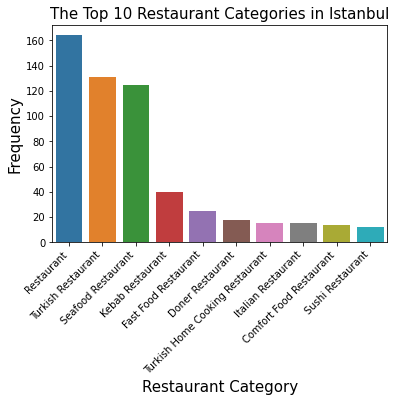

<Figure size 2160x1440 with 0 Axes>

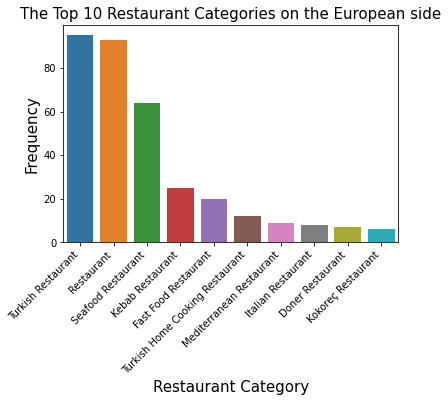

<Figure size 2160x1440 with 0 Axes>

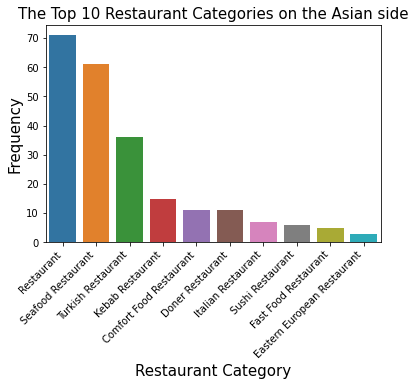

<Figure size 2160x1440 with 0 Axes>

In [26]:
import seaborn as sns
from matplotlib import pyplot as plt

def plotCategory(title,fn,data):
    s=sns.barplot(x="Category", y="Frequency", data=data)
    s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

    plt.title(title, fontsize=15)
    plt.xlabel("Restaurant Category", fontsize=15)
    plt.ylabel ("Frequency", fontsize=15)

    # Save picture for reporting
    plt.savefig(fn, dpi=300, bbox_inches = "tight")

    fig = plt.figure(figsize=(30,20))
    plt.tight_layout()
    plt.show()
    
plotCategory('The Top 10 Restaurant Categories in Istanbul','top10restaurant.png',top_ten)
plotCategory('The Top 10 Restaurant Categories on the European side','eurotop10restaurant.png',euro_top_ten)
plotCategory('The Top 10 Restaurant Categories on the Asian side','asiantop10restaurant.png',asian_top_ten)

In [27]:
istanbul_restaurant.head()

,District,District Latitude,District Longitude,District Side,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Adalar,40.876259,29.091027,Asian,Heybeliada Şafak Askeri Gazino,40.873609,29.099478,Restaurant
1,Adalar,40.876259,29.091027,Asian,Heybeliada Deniz Lisesi Kolaylık Tesisleri,40.870648,29.097261,Restaurant
2,Adalar,40.876259,29.091027,Asian,Erguvan Evyemekleri,40.876864,29.100745,Turkish Restaurant
3,Adalar,40.876259,29.091027,Asian,Heyamola,40.877757,29.100371,Seafood Restaurant
4,Adalar,40.876259,29.091027,Asian,Kayıkhane,40.877635,29.099838,Seafood Restaurant


Now we will analyze each district. First, Let's fint restaurant size per district:

In [28]:
ist_district = istanbul_restaurant.groupby(['District'])['Venue Category'].count().reset_index()
ist_district.rename(columns={"Venue Category":"Number"},inplace=True)
ist_district

,District,Number
0,Adalar,21
1,Arnavutköy,16
2,Ataşehir,13
3,Avcılar,13
4,Bahçelievler,9
5,Bakırköy,10
6,Bayrampaşa,17
7,Bağcılar,23
8,Başakşehir,20
9,Beykoz,32


In [29]:
list_district=ist_district['District'].to_list()
list_count=ist_district['Number'].to_list()

In [30]:
dummy_venue = pd.get_dummies(istanbul_restaurant[['Venue Category']], prefix="", prefix_sep="")

In [31]:
istanbul_onehot = pd.concat([istanbul_restaurant['District'], dummy_venue], axis=1)
istanbul_onehot;

In [32]:
istanbul_grouped = istanbul_onehot.groupby('District').mean().reset_index()

istanbul_grouped = istanbul_grouped.join(istanbul_df.loc[:,['District','Side']].set_index('District'), on='District')

print('shape',istanbul_grouped.shape)
istanbul_grouped.head()

shape (39, 36)


,District,African Restaurant,American Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,Bosnian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Comfort Food Restaurant,...,New American Restaurant,Restaurant,Seafood Restaurant,Sushi Restaurant,Tantuni Restaurant,Theme Restaurant,Turkish Home Cooking Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Side
0,Adalar,0.0,0.0,0.0,0.047619,0.000000,0.0,0.0000,0.0,0.000000,...,0.0,0.285714,0.523810,0.00,0.0,0.0,0.000000,0.142857,0.0,Asian
1,Arnavutköy,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0625,0.0,0.000000,...,0.0,0.250000,0.187500,0.25,0.0,0.0,0.062500,0.000000,0.0,European
2,Ataşehir,0.0,0.0,0.0,0.000000,0.076923,0.0,0.0000,0.0,0.000000,...,0.0,0.384615,0.153846,0.00,0.0,0.0,0.076923,0.076923,0.0,Asian
3,Avcılar,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0000,0.0,0.153846,...,0.0,0.384615,0.153846,0.00,0.0,0.0,0.000000,0.000000,0.0,European
4,Bahçelievler,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0000,0.0,0.000000,...,0.0,0.111111,0.222222,0.00,0.0,0.0,0.000000,0.111111,0.0,European


Each district along with the top 5 most common restaurant 

In [33]:
num_top_restaurant = 5

for d in istanbul_grouped['District']:
    print("----"+d+"----")
    temp = istanbul_grouped[istanbul_grouped['District'] == d].T.reset_index()
    temp.columns = ['Category','freq']
    temp = temp.iloc[1:-2]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_restaurant))
    print('\n')

----Adalar----
                Category  freq
0     Seafood Restaurant  0.52
1             Restaurant  0.29
2     Turkish Restaurant  0.14
3  Australian Restaurant  0.05
4       Theme Restaurant  0.00


----Arnavutköy----
                    Category  freq
0                 Restaurant  0.25
1           Sushi Restaurant  0.25
2         Seafood Restaurant  0.19
3  Cajun / Creole Restaurant  0.06
4   Mediterranean Restaurant  0.06


----Ataşehir----
                          Category  freq
0                       Restaurant  0.38
1               Seafood Restaurant  0.15
2               Italian Restaurant  0.08
3                 Doner Restaurant  0.08
4  Turkish Home Cooking Restaurant  0.08


----Avcılar----
                  Category  freq
0               Restaurant  0.38
1         Kebab Restaurant  0.15
2     Fast Food Restaurant  0.15
3       Seafood Restaurant  0.15
4  Comfort Food Restaurant  0.15


----Bahçelievler----
                    Category  freq
0         Seafood Restaurant 

In [34]:
# Function to sort the venues in descending order.
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District','Side']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
district_sorted = pd.DataFrame(columns=columns)
district_sorted['District'] = istanbul_grouped['District']
district_sorted['Side'] = istanbul_grouped['Side']

for ind in np.arange(istanbul_grouped.shape[0]):
    district_sorted.iloc[ind, 2:] = return_most_common_venues(istanbul_grouped.iloc[ind, :-1], num_top_venues)

district_sorted

,District,Side,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Adalar,Asian,Seafood Restaurant,Restaurant,Turkish Restaurant,Australian Restaurant,Comfort Food Restaurant
1,Arnavutköy,European,Restaurant,Sushi Restaurant,Seafood Restaurant,Italian Restaurant,Mediterranean Restaurant
2,Ataşehir,Asian,Restaurant,Seafood Restaurant,Italian Restaurant,Turkish Home Cooking Restaurant,Turkish Restaurant
3,Avcılar,European,Restaurant,Kebab Restaurant,Fast Food Restaurant,Seafood Restaurant,Comfort Food Restaurant
4,Bahçelievler,European,Fast Food Restaurant,Seafood Restaurant,Middle Eastern Restaurant,Turkish Restaurant,Kebab Restaurant
5,Bakırköy,European,Restaurant,Turkish Restaurant,Seafood Restaurant,Kebab Restaurant,Kokoreç Restaurant
6,Bayrampaşa,European,Turkish Restaurant,Restaurant,Turkish Home Cooking Restaurant,Seafood Restaurant,Italian Restaurant
7,Bağcılar,European,Turkish Restaurant,Kebab Restaurant,Seafood Restaurant,Restaurant,Doner Restaurant
8,Başakşehir,European,Turkish Restaurant,Restaurant,Turkish Home Cooking Restaurant,Seafood Restaurant,Kebab Restaurant
9,Beykoz,Asian,Seafood Restaurant,Restaurant,Italian Restaurant,Turkish Restaurant,Chinese Restaurant


## Cluster Districts

In [35]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
K = 3

istanbul_grouped_cluster = istanbul_grouped.drop('District', 1).drop('Side', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=K, random_state=0).fit(istanbul_grouped_cluster)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 1, 1, 1, 0, 1, 2, 1, 2, 0, 1, 2, 2, 0, 2, 1, 2, 1, 2, 1, 1, 1,
       1, 2, 1, 1, 1, 0, 0, 2, 2, 0, 2, 2, 1, 1, 2, 0, 2], dtype=int32)

In [36]:
# Set Cluster labels

district_sorted.insert(0, 'Cluster', kmeans.labels_)

print('shape', district_sorted.shape)
district_sorted.head()

shape (39, 8)


,Cluster,District,Side,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,0,Adalar,Asian,Seafood Restaurant,Restaurant,Turkish Restaurant,Australian Restaurant,Comfort Food Restaurant
1,1,Arnavutköy,European,Restaurant,Sushi Restaurant,Seafood Restaurant,Italian Restaurant,Mediterranean Restaurant
2,1,Ataşehir,Asian,Restaurant,Seafood Restaurant,Italian Restaurant,Turkish Home Cooking Restaurant,Turkish Restaurant
3,1,Avcılar,European,Restaurant,Kebab Restaurant,Fast Food Restaurant,Seafood Restaurant,Comfort Food Restaurant
4,0,Bahçelievler,European,Fast Food Restaurant,Seafood Restaurant,Middle Eastern Restaurant,Turkish Restaurant,Kebab Restaurant


Let's visualize the clusters

In [37]:
istanbul_merge = istanbul_df.join(district_sorted.drop('Side', 1).set_index('District'), on='District')
istanbul_merge = istanbul_merge.dropna().reset_index(drop=True) # drop all na rows

print('shape',istanbul_merge.shape)
istanbul_merge.head()

shape (39, 15)


,District,Population,Area,Density,Mensual,Annual,Latitude,Longitude,Side,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Adalar,15238,11.05,1379,6.652₺ (918$),"79.821₺ (10,978$)",40.876259,29.091027,Asian,0,Seafood Restaurant,Restaurant,Turkish Restaurant,Australian Restaurant,Comfort Food Restaurant
1,Arnavutköy,282488,450.35,627,2.030₺ (279$),"24.360₺ (3,350$)",41.068394,29.041154,European,1,Restaurant,Sushi Restaurant,Seafood Restaurant,Italian Restaurant,Mediterranean Restaurant
2,Ataşehir,425094,25.23,16849,6.577₺ (904$),"78.924₺ (10,854$)",40.984749,29.106720,Asian,1,Restaurant,Seafood Restaurant,Italian Restaurant,Turkish Home Cooking Restaurant,Turkish Restaurant
3,Avcılar,448882,42.01,10685,3.662₺ (503$),"43.938₺ (6,064$)",40.980135,28.717547,European,1,Restaurant,Kebab Restaurant,Fast Food Restaurant,Seafood Restaurant,Comfort Food Restaurant
4,Bağcılar,745125,22.36,33324,3.197₺ (441$),"38.367₺ (5,295$)",41.033899,28.857898,European,1,Turkish Restaurant,Kebab Restaurant,Seafood Restaurant,Restaurant,Doner Restaurant


Cluster Analysis

In [38]:
import matplotlib.cm as cm
import matplotlib.colors as colors

def mapdistrict(K,df):
    
    map_district = folium.Map(location=[istanbul_latitude,istanbul_longitude], tiles='cartodbpositron', 
                               attr="<a href=https://github.com/python-visualization/folium/>Folium</a>")
    # set color scheme for the clusters
    x = np.arange(K)
    ys = [i + x + (i*x)**2 for i in range(K)]
    colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
    rainbow = [colors.rgb2hex(i) for i in colors_array]

    # add markers to the map
    for lat, lon, poi, cluster in zip(df['Latitude'], 
                                      df['Longitude'], 
                                      df['District'], 
                                      df['Cluster']):
        label = folium.Popup(unidecode.unidecode(poi) + ' Cluster ' + str(cluster), parse_html=True)
        folium.CircleMarker(
            [lat, lon],
            radius=list_count[list_district.index(poi)]*0.5,
            popup=label,
            color=rainbow[int(cluster)-1],
            fill=True,
            fill_color=rainbow[int(cluster)-1],
            fill_opacity=0.7).add_to(map_district)

    return map_district
    
map_district = mapdistrict(K,istanbul_merge)
map_district

In [39]:
istanbul_merge.loc[istanbul_merge['Cluster'] == 0, istanbul_merge.columns[[0] + list(range(1, istanbul_merge.shape[1]))]].reset_index(drop=True)

,District,Population,Area,Density,Mensual,Annual,Latitude,Longitude,Side,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Adalar,15238,11.05,1379,6.652₺ (918$),"79.821₺ (10,978$)",40.876259,29.091027,Asian,0,Seafood Restaurant,Restaurant,Turkish Restaurant,Australian Restaurant,Comfort Food Restaurant
1,Bahçelievler,611059,16.62,36766,4.674₺ (645$),"56.088₺ (7,741$)",40.999172,28.861256,European,0,Fast Food Restaurant,Seafood Restaurant,Middle Eastern Restaurant,Turkish Restaurant,Kebab Restaurant
2,Beykoz,248260,310.36,800,3.693₺ (509$),"44.316₺ (6,116$)",41.123936,29.108315,Asian,0,Seafood Restaurant,Restaurant,Italian Restaurant,Turkish Restaurant,Chinese Restaurant
3,Büyükçekmece,254103,139.17,1826,3.671₺ (506$),"44.049₺ (6,079$)",41.015691,28.595524,European,0,Seafood Restaurant,Restaurant,Turkish Restaurant,Italian Restaurant,Turkish Home Cooking Restaurant
4,Sarıyer,347214,175.39,1980,"7.308₺ (1,008$)","87.696₺ (12,104$)",41.170603,29.054363,European,0,Seafood Restaurant,Turkish Restaurant,Kebab Restaurant,Doner Restaurant,American Restaurant
5,Silivri,193680,869.52,223,2.372₺ (327$),"28.464₺ (3,928$)",41.073204,28.246922,European,0,Seafood Restaurant,Restaurant,Turkish Restaurant,Kokoreç Restaurant,Doner Restaurant
6,Şile,37692,781.72,48,2.482₺ (342$),"29.789₺ (4,111$)",41.174407,29.612522,Asian,0,Seafood Restaurant,Restaurant,Fast Food Restaurant,Turkish Home Cooking Restaurant,Comfort Food Restaurant
7,Tuzla,267400,123.63,2163,3.407₺ (470$),"40.884₺ (5,643$)",40.816667,29.300833,Asian,0,Seafood Restaurant,Restaurant,Kebab Restaurant,Doner Restaurant,Vegetarian / Vegan Restaurant


In [40]:
istanbul_merge.loc[istanbul_merge['Cluster'] == 1, istanbul_merge.columns[[0] + list(range(1, istanbul_merge.shape[1]))]].reset_index(drop=True)

,District,Population,Area,Density,Mensual,Annual,Latitude,Longitude,Side,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Arnavutköy,282488,450.35,627,2.030₺ (279$),"24.360₺ (3,350$)",41.068394,29.041154,European,1,Restaurant,Sushi Restaurant,Seafood Restaurant,Italian Restaurant,Mediterranean Restaurant
1,Ataşehir,425094,25.23,16849,6.577₺ (904$),"78.924₺ (10,854$)",40.984749,29.106720,Asian,1,Restaurant,Seafood Restaurant,Italian Restaurant,Turkish Home Cooking Restaurant,Turkish Restaurant
2,Avcılar,448882,42.01,10685,3.662₺ (503$),"43.938₺ (6,064$)",40.980135,28.717547,European,1,Restaurant,Kebab Restaurant,Fast Food Restaurant,Seafood Restaurant,Comfort Food Restaurant
3,Bağcılar,745125,22.36,33324,3.197₺ (441$),"38.367₺ (5,295$)",41.033899,28.857898,European,1,Turkish Restaurant,Kebab Restaurant,Seafood Restaurant,Restaurant,Doner Restaurant
4,Bakırköy,229239,29.64,7734,"8.845₺ (1,220$)","106.140₺ (14,650$)",40.983541,28.867974,European,1,Restaurant,Turkish Restaurant,Seafood Restaurant,Kebab Restaurant,Kokoreç Restaurant
5,Beylikdüzü,352412,37.78,9328,4.327₺ (597$),"51.924₺ (7,166$)",41.001026,28.641984,European,1,Restaurant,Turkish Restaurant,Fast Food Restaurant,Mediterranean Restaurant,Italian Restaurant
6,Çekmeköy,264508,148.09,1786,3.503₺ (483$),"42.033₺ (5,801$)",41.040210,29.175059,Asian,1,Restaurant,Turkish Restaurant,Doner Restaurant,Seafood Restaurant,Comfort Food Restaurant
7,Esenyurt,954579,43.13,22133,3.024₺ (417$),"36.288₺ (5,008$)",41.034240,28.680018,European,1,Restaurant,Turkish Restaurant,Kebab Restaurant,Mediterranean Restaurant,Italian Restaurant
8,Fatih,443090,15.59,28421,5.281₺ (728$),"63.378₺ (8,747$)",41.030190,28.675696,European,1,Restaurant,Turkish Restaurant,Mediterranean Restaurant,Asian Restaurant,Kebab Restaurant
9,Güngören,289441,7.21,40144,3.388₺ (467$),"40.656₺ (5,611$)",41.022871,28.872629,European,1,Restaurant,Fast Food Restaurant,Turkish Restaurant,Kebab Restaurant,Seafood Restaurant


In [41]:
istanbul_merge.loc[istanbul_merge['Cluster'] == 2, istanbul_merge.columns[[0] + list(range(1, istanbul_merge.shape[1]))]].reset_index(drop=True)

,District,Population,Area,Density,Mensual,Annual,Latitude,Longitude,Side,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Başakşehir,460259,104.30,4413,4.513₺ (622$),"54.152₺ (7,474$)",41.097693,28.806163,European,2,Turkish Restaurant,Restaurant,Turkish Home Cooking Restaurant,Seafood Restaurant,Kebab Restaurant
1,Bayrampaşa,274735,9.61,28588,3.480₺ (480$),"41.762₺ (5,764$)",41.035738,28.912260,European,2,Turkish Restaurant,Restaurant,Turkish Home Cooking Restaurant,Seafood Restaurant,Italian Restaurant
2,Beşiktaş,182649,18.01,10142,"10.560₺ (1,457$)","126.720₺ (17,490$)",41.042847,29.007528,European,2,Turkish Restaurant,Restaurant,French Restaurant,Comfort Food Restaurant,Greek Restaurant
3,Beyoğlu,233323,8.91,26187,4.773₺ (658$),"57.275₺ (7,905$)",41.028423,28.973681,European,2,Turkish Restaurant,Kebab Restaurant,Restaurant,Greek Restaurant,Italian Restaurant
4,Çatalca,73718,1115.13,66,2.128₺ (293$),"25.536₺ (3,524$)",41.143563,28.461969,European,2,Turkish Restaurant,Restaurant,Turkish Home Cooking Restaurant,Sushi Restaurant,Vegetarian / Vegan Restaurant
5,Esenler,450344,18.43,24435,2.847₺ (392$),"34.164₺ (4,715$)",41.033254,28.890953,European,2,Turkish Restaurant,Restaurant,Fast Food Restaurant,Seafood Restaurant,Italian Restaurant
6,Eyüpsultan,400513,228.42,1753,4.670₺ (644$),"56.044₺ (7,735$)",41.046044,28.925324,European,2,Turkish Restaurant,Restaurant,Italian Restaurant,Turkish Home Cooking Restaurant,Fast Food Restaurant
7,Gaziosmanpaşa,491962,11.76,41834,3.019₺ (416$),"36.228₺ (5,000$)",41.057526,28.915650,European,2,Turkish Restaurant,Restaurant,Turkish Home Cooking Restaurant,Tantuni Restaurant,Fast Food Restaurant
8,Küçükçekmece,792821,37.54,21119,3.567₺ (492$),"42.804₺ (5,908$)",41.000214,28.780889,European,2,Turkish Restaurant,Seafood Restaurant,Restaurant,Kebab Restaurant,Vegetarian / Vegan Restaurant
9,Sultanbeyli,336021,29.14,11531,2.172₺ (299$),"26.064₺ (3,597$)",40.968087,29.258789,Asian,2,Turkish Restaurant,Restaurant,Kebab Restaurant,Comfort Food Restaurant,Theme Restaurant


### Asian Clusters

In [42]:
asian_df = istanbul_df[istanbul_df['Side']=='Asian'].reset_index(drop=True).drop('Side', 1)
asian_grouped = istanbul_grouped[istanbul_grouped['Side']=='Asian'].reset_index(drop=True)

asian_grouped_cluster = asian_grouped.drop('District', 1).drop('Side', 1)

# run k-means clustering
asian_kmeans = KMeans(n_clusters=K, random_state=0).fit(asian_grouped_cluster)

# check cluster labels generated for each row in the dataframe
print('kmeans',asian_kmeans.labels_)

asian_district_sorted=district_sorted[district_sorted['Side']=='Asian'].reset_index(drop=True).drop('Cluster', 1)

asian_district_sorted.insert(0, 'Cluster', asian_kmeans.labels_)

print('shape', asian_district_sorted.shape)
asian_district_sorted.head()

kmeans [0 2 0 2 1 2 1 1 1 0 1 1 1 0]
shape (14, 8)


,Cluster,District,Side,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,0,Adalar,Asian,Seafood Restaurant,Restaurant,Turkish Restaurant,Australian Restaurant,Comfort Food Restaurant
1,2,Ataşehir,Asian,Restaurant,Seafood Restaurant,Italian Restaurant,Turkish Home Cooking Restaurant,Turkish Restaurant
2,0,Beykoz,Asian,Seafood Restaurant,Restaurant,Italian Restaurant,Turkish Restaurant,Chinese Restaurant
3,2,Kadıköy,Asian,Restaurant,Sushi Restaurant,Seafood Restaurant,Modern European Restaurant,Vegetarian / Vegan Restaurant
4,1,Kartal,Asian,Restaurant,Turkish Restaurant,Seafood Restaurant,Comfort Food Restaurant,Eastern European Restaurant


In [43]:
asian_merge = asian_df.join(asian_district_sorted.drop('Side', 1).set_index('District'), on='District')
asian_merge = asian_merge.dropna().reset_index(drop=True) # drop all na rows

print('shape', asian_merge.shape)
asian_merge.head()

shape (14, 14)


,District,Population,Area,Density,Mensual,Annual,Latitude,Longitude,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Adalar,15238,11.05,1379,6.652₺ (918$),"79.821₺ (10,978$)",40.876259,29.091027,0,Seafood Restaurant,Restaurant,Turkish Restaurant,Australian Restaurant,Comfort Food Restaurant
1,Ataşehir,425094,25.23,16849,6.577₺ (904$),"78.924₺ (10,854$)",40.984749,29.106720,2,Restaurant,Seafood Restaurant,Italian Restaurant,Turkish Home Cooking Restaurant,Turkish Restaurant
2,Beykoz,248260,310.36,800,3.693₺ (509$),"44.316₺ (6,116$)",41.123936,29.108315,0,Seafood Restaurant,Restaurant,Italian Restaurant,Turkish Restaurant,Chinese Restaurant
3,Çekmeköy,264508,148.09,1786,3.503₺ (483$),"42.033₺ (5,801$)",41.040210,29.175059,1,Restaurant,Turkish Restaurant,Doner Restaurant,Seafood Restaurant,Comfort Food Restaurant
4,Kadıköy,482713,25.09,19239,"9.025₺ (1,245$)","108.300₺ (14,948$)",40.991572,29.027017,2,Restaurant,Sushi Restaurant,Seafood Restaurant,Modern European Restaurant,Vegetarian / Vegan Restaurant


In [44]:
asian_merge.loc[asian_merge['Cluster'] == 0, asian_merge.columns[[0] + list(range(1, asian_merge.shape[1]))]].reset_index(drop=True)

,District,Population,Area,Density,Mensual,Annual,Latitude,Longitude,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Adalar,15238,11.05,1379,6.652₺ (918$),"79.821₺ (10,978$)",40.876259,29.091027,0,Seafood Restaurant,Restaurant,Turkish Restaurant,Australian Restaurant,Comfort Food Restaurant
1,Beykoz,248260,310.36,800,3.693₺ (509$),"44.316₺ (6,116$)",41.123936,29.108315,0,Seafood Restaurant,Restaurant,Italian Restaurant,Turkish Restaurant,Chinese Restaurant
2,Şile,37692,781.72,48,2.482₺ (342$),"29.789₺ (4,111$)",41.174407,29.612522,0,Seafood Restaurant,Restaurant,Fast Food Restaurant,Turkish Home Cooking Restaurant,Comfort Food Restaurant
3,Tuzla,267400,123.63,2163,3.407₺ (470$),"40.884₺ (5,643$)",40.816667,29.300833,0,Seafood Restaurant,Restaurant,Kebab Restaurant,Doner Restaurant,Vegetarian / Vegan Restaurant


In [45]:
asian_merge.loc[asian_merge['Cluster'] == 1, asian_merge.columns[[0] + list(range(1, asian_merge.shape[1]))]].reset_index(drop=True)

,District,Population,Area,Density,Mensual,Annual,Latitude,Longitude,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Çekmeköy,264508,148.09,1786,3.503₺ (483$),"42.033₺ (5,801$)",41.040210,29.175059,1,Restaurant,Turkish Restaurant,Doner Restaurant,Seafood Restaurant,Comfort Food Restaurant
1,Kartal,470676,38.54,12213,4.120₺ (568$),"49.443₺ (6,824$)",40.888492,29.189602,1,Restaurant,Turkish Restaurant,Seafood Restaurant,Comfort Food Restaurant,Eastern European Restaurant
2,Pendik,711894,179.99,3955,3.055₺ (421$),"36.664₺ (5,060$)",40.876589,29.233342,1,Turkish Restaurant,Restaurant,Seafood Restaurant,Bosnian Restaurant,Fast Food Restaurant
3,Sancaktepe,436733,62.42,6997,2.633₺ (363$),"31.602₺ (4,361$)",40.996887,29.236601,1,Restaurant,Kebab Restaurant,Comfort Food Restaurant,Turkish Restaurant,Halal Restaurant
4,Sultanbeyli,336021,29.14,11531,2.172₺ (299$),"26.064₺ (3,597$)",40.968087,29.258789,1,Turkish Restaurant,Restaurant,Kebab Restaurant,Comfort Food Restaurant,Theme Restaurant
5,Ümraniye,710280,45.31,15676,3.637₺ (502$),"43.641₺ (6,023$)",41.022269,29.090073,1,Restaurant,Turkish Restaurant,Doner Restaurant,Italian Restaurant,Comfort Food Restaurant
6,Üsküdar,531825,35.33,15053,6.987₺ (964$),"83.839₺ (11,572$)",41.024905,29.017528,1,Turkish Restaurant,French Restaurant,Sushi Restaurant,Restaurant,Chinese Restaurant


In [46]:
asian_merge.loc[asian_merge['Cluster'] == 2, asian_merge.columns[[0] + list(range(1, asian_merge.shape[1]))]].reset_index(drop=True)

,District,Population,Area,Density,Mensual,Annual,Latitude,Longitude,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Ataşehir,425094,25.23,16849,6.577₺ (904$),"78.924₺ (10,854$)",40.984749,29.106720,2,Restaurant,Seafood Restaurant,Italian Restaurant,Turkish Home Cooking Restaurant,Turkish Restaurant
1,Kadıköy,482713,25.09,19239,"9.025₺ (1,245$)","108.300₺ (14,948$)",40.991572,29.027017,2,Restaurant,Sushi Restaurant,Seafood Restaurant,Modern European Restaurant,Vegetarian / Vegan Restaurant
2,Maltepe,513316,52.97,9691,5.772₺ (796$),"69.259₺ (9,559$)",40.923542,29.132836,2,Restaurant,Seafood Restaurant,Kebab Restaurant,Doner Restaurant,New American Restaurant


In [47]:
map_district = mapdistrict(K, asian_merge)
map_district

### European Clusters

In [48]:
euro_df = istanbul_df[istanbul_df['Side']=='European'].reset_index(drop=True).drop('Side', 1)
euro_grouped = istanbul_grouped[istanbul_grouped['Side']=='European'].reset_index(drop=True)

euro_grouped_cluster = euro_grouped.drop('District', 1).drop('Side', 1)

# run k-means clustering
euro_kmeans = KMeans(n_clusters=K, random_state=0).fit(euro_grouped_cluster)

# check cluster labels generated for each row in the dataframe
print('kmeans',euro_kmeans.labels_)

euro_district_sorted=district_sorted[district_sorted['Side']=='European'].reset_index(drop=True).drop('Cluster', 1)

euro_district_sorted.insert(0, 'Cluster', euro_kmeans.labels_)

print('shape', euro_district_sorted.shape)
euro_district_sorted.head()

kmeans [0 0 2 2 1 2 1 0 1 1 2 1 0 1 0 1 2 0 1 2 2 1 1 1 1]
shape (25, 8)


,Cluster,District,Side,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,0,Arnavutköy,European,Restaurant,Sushi Restaurant,Seafood Restaurant,Italian Restaurant,Mediterranean Restaurant
1,0,Avcılar,European,Restaurant,Kebab Restaurant,Fast Food Restaurant,Seafood Restaurant,Comfort Food Restaurant
2,2,Bahçelievler,European,Fast Food Restaurant,Seafood Restaurant,Middle Eastern Restaurant,Turkish Restaurant,Kebab Restaurant
3,2,Bakırköy,European,Restaurant,Turkish Restaurant,Seafood Restaurant,Kebab Restaurant,Kokoreç Restaurant
4,1,Bayrampaşa,European,Turkish Restaurant,Restaurant,Turkish Home Cooking Restaurant,Seafood Restaurant,Italian Restaurant


In [49]:
euro_merge = euro_df.join(euro_district_sorted.drop('Side', 1).set_index('District'), on='District')
euro_merge = euro_merge.dropna().reset_index(drop=True) # drop all na rows

print('shape', euro_merge.shape)
euro_merge.head()

shape (25, 14)


,District,Population,Area,Density,Mensual,Annual,Latitude,Longitude,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Arnavutköy,282488,450.35,627,2.030₺ (279$),"24.360₺ (3,350$)",41.068394,29.041154,0,Restaurant,Sushi Restaurant,Seafood Restaurant,Italian Restaurant,Mediterranean Restaurant
1,Avcılar,448882,42.01,10685,3.662₺ (503$),"43.938₺ (6,064$)",40.980135,28.717547,0,Restaurant,Kebab Restaurant,Fast Food Restaurant,Seafood Restaurant,Comfort Food Restaurant
2,Bağcılar,745125,22.36,33324,3.197₺ (441$),"38.367₺ (5,295$)",41.033899,28.857898,2,Turkish Restaurant,Kebab Restaurant,Seafood Restaurant,Restaurant,Doner Restaurant
3,Bahçelievler,611059,16.62,36766,4.674₺ (645$),"56.088₺ (7,741$)",40.999172,28.861256,2,Fast Food Restaurant,Seafood Restaurant,Middle Eastern Restaurant,Turkish Restaurant,Kebab Restaurant
4,Bakırköy,229239,29.64,7734,"8.845₺ (1,220$)","106.140₺ (14,650$)",40.983541,28.867974,2,Restaurant,Turkish Restaurant,Seafood Restaurant,Kebab Restaurant,Kokoreç Restaurant


In [50]:
euro_merge.loc[euro_merge['Cluster'] == 0, euro_merge.columns[[0] + list(range(1, euro_merge.shape[1]))]].reset_index(drop=True)

,District,Population,Area,Density,Mensual,Annual,Latitude,Longitude,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Arnavutköy,282488,450.35,627,2.030₺ (279$),"24.360₺ (3,350$)",41.068394,29.041154,0,Restaurant,Sushi Restaurant,Seafood Restaurant,Italian Restaurant,Mediterranean Restaurant
1,Avcılar,448882,42.01,10685,3.662₺ (503$),"43.938₺ (6,064$)",40.980135,28.717547,0,Restaurant,Kebab Restaurant,Fast Food Restaurant,Seafood Restaurant,Comfort Food Restaurant
2,Beylikdüzü,352412,37.78,9328,4.327₺ (597$),"51.924₺ (7,166$)",41.001026,28.641984,0,Restaurant,Turkish Restaurant,Fast Food Restaurant,Mediterranean Restaurant,Italian Restaurant
3,Esenyurt,954579,43.13,22133,3.024₺ (417$),"36.288₺ (5,008$)",41.034240,28.680018,0,Restaurant,Turkish Restaurant,Kebab Restaurant,Mediterranean Restaurant,Italian Restaurant
4,Fatih,443090,15.59,28421,5.281₺ (728$),"63.378₺ (8,747$)",41.030190,28.675696,0,Restaurant,Turkish Restaurant,Mediterranean Restaurant,Asian Restaurant,Kebab Restaurant
5,Kağıthane,448025,14.87,30129,4.188₺ (578$),"50.260₺ (6,937$)",41.085980,28.972621,0,Restaurant,Vegetarian / Vegan Restaurant,Middle Eastern Restaurant,Turkish Restaurant,Sushi Restaurant


In [51]:
euro_merge.loc[euro_merge['Cluster'] == 1, euro_merge.columns[[0] + list(range(1, euro_merge.shape[1]))]].reset_index(drop=True)

,District,Population,Area,Density,Mensual,Annual,Latitude,Longitude,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Başakşehir,460259,104.30,4413,4.513₺ (622$),"54.152₺ (7,474$)",41.097693,28.806163,1,Turkish Restaurant,Restaurant,Turkish Home Cooking Restaurant,Seafood Restaurant,Kebab Restaurant
1,Bayrampaşa,274735,9.61,28588,3.480₺ (480$),"41.762₺ (5,764$)",41.035738,28.912260,1,Turkish Restaurant,Restaurant,Turkish Home Cooking Restaurant,Seafood Restaurant,Italian Restaurant
2,Beşiktaş,182649,18.01,10142,"10.560₺ (1,457$)","126.720₺ (17,490$)",41.042847,29.007528,1,Turkish Restaurant,Restaurant,French Restaurant,Comfort Food Restaurant,Greek Restaurant
3,Beyoğlu,233323,8.91,26187,4.773₺ (658$),"57.275₺ (7,905$)",41.028423,28.973681,1,Turkish Restaurant,Kebab Restaurant,Restaurant,Greek Restaurant,Italian Restaurant
4,Çatalca,73718,1115.13,66,2.128₺ (293$),"25.536₺ (3,524$)",41.143563,28.461969,1,Turkish Restaurant,Restaurant,Turkish Home Cooking Restaurant,Sushi Restaurant,Vegetarian / Vegan Restaurant
5,Esenler,450344,18.43,24435,2.847₺ (392$),"34.164₺ (4,715$)",41.033254,28.890953,1,Turkish Restaurant,Restaurant,Fast Food Restaurant,Seafood Restaurant,Italian Restaurant
6,Eyüpsultan,400513,228.42,1753,4.670₺ (644$),"56.044₺ (7,735$)",41.046044,28.925324,1,Turkish Restaurant,Restaurant,Italian Restaurant,Turkish Home Cooking Restaurant,Fast Food Restaurant
7,Gaziosmanpaşa,491962,11.76,41834,3.019₺ (416$),"36.228₺ (5,000$)",41.057526,28.915650,1,Turkish Restaurant,Restaurant,Turkish Home Cooking Restaurant,Tantuni Restaurant,Fast Food Restaurant
8,Küçükçekmece,792821,37.54,21119,3.567₺ (492$),"42.804₺ (5,908$)",41.000214,28.780889,1,Turkish Restaurant,Seafood Restaurant,Restaurant,Kebab Restaurant,Vegetarian / Vegan Restaurant
9,Sultangazi,534565,36.30,14726,2.187₺ (301$),"26.244₺ (3,622$)",41.109240,28.882614,1,Turkish Restaurant,Restaurant,Turkish Home Cooking Restaurant,Fast Food Restaurant,Kebab Restaurant


In [52]:
euro_merge.loc[euro_merge['Cluster'] == 2, euro_merge.columns[[0] + list(range(1, euro_merge.shape[1]))]].reset_index(drop=True)

,District,Population,Area,Density,Mensual,Annual,Latitude,Longitude,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Bağcılar,745125,22.36,33324,3.197₺ (441$),"38.367₺ (5,295$)",41.033899,28.857898,2,Turkish Restaurant,Kebab Restaurant,Seafood Restaurant,Restaurant,Doner Restaurant
1,Bahçelievler,611059,16.62,36766,4.674₺ (645$),"56.088₺ (7,741$)",40.999172,28.861256,2,Fast Food Restaurant,Seafood Restaurant,Middle Eastern Restaurant,Turkish Restaurant,Kebab Restaurant
2,Bakırköy,229239,29.64,7734,"8.845₺ (1,220$)","106.140₺ (14,650$)",40.983541,28.867974,2,Restaurant,Turkish Restaurant,Seafood Restaurant,Kebab Restaurant,Kokoreç Restaurant
3,Büyükçekmece,254103,139.17,1826,3.671₺ (506$),"44.049₺ (6,079$)",41.015691,28.595524,2,Seafood Restaurant,Restaurant,Turkish Restaurant,Italian Restaurant,Turkish Home Cooking Restaurant
4,Güngören,289441,7.21,40144,3.388₺ (467$),"40.656₺ (5,611$)",41.022871,28.872629,2,Restaurant,Fast Food Restaurant,Turkish Restaurant,Kebab Restaurant,Seafood Restaurant
5,Sarıyer,347214,175.39,1980,"7.308₺ (1,008$)","87.696₺ (12,104$)",41.170603,29.054363,2,Seafood Restaurant,Turkish Restaurant,Kebab Restaurant,Doner Restaurant,American Restaurant
6,Silivri,193680,869.52,223,2.372₺ (327$),"28.464₺ (3,928$)",41.073204,28.246922,2,Seafood Restaurant,Restaurant,Turkish Restaurant,Kokoreç Restaurant,Doner Restaurant


In [53]:
map_district = mapdistrict(K, euro_merge)
map_district